In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
import seaborn as sns

In [ ]:
df = pd.read_csv('credit_score_movement.csv')

In [3]:
df.describe()

,customer_id,age,monthly_income,monthly_emi_outflow,num_open_loans,total_credit_limit,months_since_last_default,current_outstanding,dpd_last_3_months,num_hard_inquiries_last_6,credit_utilization_ratio,recent_credit_card_usage,recent_loan_disbursed_amount,repayment_history_score
count,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000
mean,25000.500000,36.86914,63270.531400,15480.566620,1.940660,486747.467860,175.941300,255423.767484,5.648900,1.097680,0.528386,0.628425,1.102506e+05,0.528383
std,14433.901067,12.07240,24816.116142,15457.839619,1.444708,186895.771087,98.466074,189308.830571,9.877337,1.219905,0.324480,0.175898,1.188419e+05,0.195723
min,1.000000,18.00000,8000.000000,0.000000,0.000000,34377.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.132321,0.000000e+00,0.041000
25%,12500.750000,27.00000,45904.500000,2887.750000,1.000000,337777.500000,48.000000,101400.000000,0.000000,0.000000,0.273632,0.499561,0.000000e+00,0.363000
50%,25000.500000,34.00000,67060.000000,11331.500000,2.000000,495338.500000,240.000000,247818.000000,0.000000,1.000000,0.598236,0.651173,1.002100e+05,0.504000
75%,37500.250000,46.00000,82573.500000,24096.250000,3.000000,651624.750000,240.000000,372577.500000,10.000000,2.000000,0.803593,0.765370,1.737042e+05,0.700000
max,50000.000000,65.00000,113838.000000,154671.000000,10.000000,914915.000000,240.000000,869832.000000,60.000000,9.000000,0.999976,1.100957,5.319665e+06,0.900000


In [4]:

df.drop(['gender' , 'location', 'customer_id', 'total_credit_limit', 'current_outstanding'], axis = 1, inplace= True)

target_encoder = LabelEncoder()
df['target_credit_score_movement'] = target_encoder.fit_transform(df['target_credit_score_movement'])

Since Most of the people never defauled this col has so many 240, which creates a imbalnce and outliers, so Created new col 'never_defaulted'

In [5]:
df['never_defaulted'] = (df['months_since_last_default'] == 240).astype(int)
df['months_since_last_default_cleaned'] = df['months_since_last_default'].replace(240, np.nan).fillna(48)

In [6]:
df

,age,monthly_income,monthly_emi_outflow,num_open_loans,months_since_last_default,dpd_last_3_months,num_hard_inquiries_last_6,credit_utilization_ratio,recent_credit_card_usage,recent_loan_disbursed_amount,repayment_history_score,target_credit_score_movement,never_defaulted,months_since_last_default_cleaned
0,34,68402,11017,1,240,1,1,0.914346,0.809645,136804.0,0.360,2,1,48.0
1,29,39708,6526,2,3,0,0,0.683370,0.653300,0.0,0.350,2,0,3.0
2,42,106087,20145,5,240,20,4,0.443179,0.777369,0.0,0.378,2,1,48.0
3,28,49975,4656,1,240,0,0,0.899351,0.766941,102153.0,0.700,2,1,48.0
4,29,55402,12311,2,240,0,2,0.465425,0.577841,165541.0,0.729,2,1,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,52,88707,39135,2,240,0,0,0.659107,0.563643,177414.0,0.490,2,1,48.0
49996,28,45427,20975,1,240,0,1,0.070653,0.426326,0.0,0.630,1,1,48.0
49997,49,105773,51829,2,240,10,2,0.631578,0.832205,211546.0,0.353,2,1,48.0
49998,33,64071,8949,2,240,5,1,0.708261,0.731088,128142.0,0.504,0,1,48.0


In [7]:
# Create ratio
df['emi_to_income_ratio'] = df['monthly_emi_outflow'] / df['monthly_income']

# Cap extreme values
df.loc[df['emi_to_income_ratio'] > 1, 'emi_to_income_ratio'] = 0.95

# Drop raw columns
df.drop(['monthly_emi_outflow', 'monthly_income'], axis=1, inplace=True)

In [8]:
df.drop(['months_since_last_default'], inplace= True, axis= 1)

In [9]:
df

,age,num_open_loans,dpd_last_3_months,num_hard_inquiries_last_6,credit_utilization_ratio,recent_credit_card_usage,recent_loan_disbursed_amount,repayment_history_score,target_credit_score_movement,never_defaulted,months_since_last_default_cleaned,emi_to_income_ratio
0,34,1,1,1,0.914346,0.809645,136804.0,0.360,2,1,48.0,0.161063
1,29,2,0,0,0.683370,0.653300,0.0,0.350,2,0,3.0,0.164350
2,42,5,20,4,0.443179,0.777369,0.0,0.378,2,1,48.0,0.189891
3,28,1,0,0,0.899351,0.766941,102153.0,0.700,2,1,48.0,0.093167
4,29,2,0,2,0.465425,0.577841,165541.0,0.729,2,1,48.0,0.222212
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,52,2,0,0,0.659107,0.563643,177414.0,0.490,2,1,48.0,0.441171
49996,28,1,0,1,0.070653,0.426326,0.0,0.630,1,1,48.0,0.461730
49997,49,2,10,2,0.631578,0.832205,211546.0,0.353,2,1,48.0,0.490002
49998,33,2,5,1,0.708261,0.731088,128142.0,0.504,0,1,48.0,0.139673


In [10]:
df[['recent_loan_disbursed_amount']].describe()


,recent_loan_disbursed_amount
count,5.000000e+04
mean,1.102506e+05
std,1.188419e+05
min,0.000000e+00
25%,0.000000e+00
50%,1.002100e+05
75%,1.737042e+05
max,5.319665e+06


In [11]:
df['recent_loan_disbursed_amount_log'] = np.log1p(df['recent_loan_disbursed_amount'])
df['is_high_loan_outlier'] = (
    df['recent_loan_disbursed_amount'] > df['recent_loan_disbursed_amount'].quantile(0.99)
).astype(int)

In [12]:
df.drop(['recent_loan_disbursed_amount'], inplace=True, axis= 1)

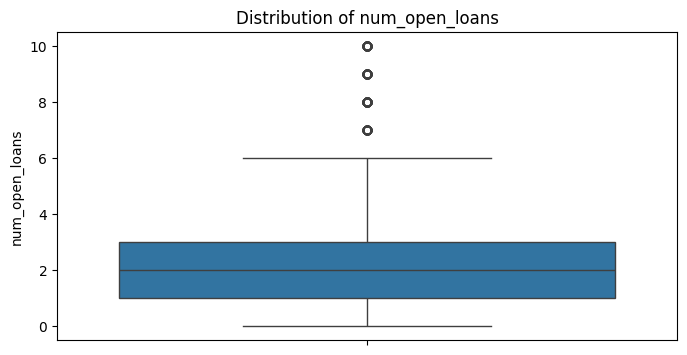

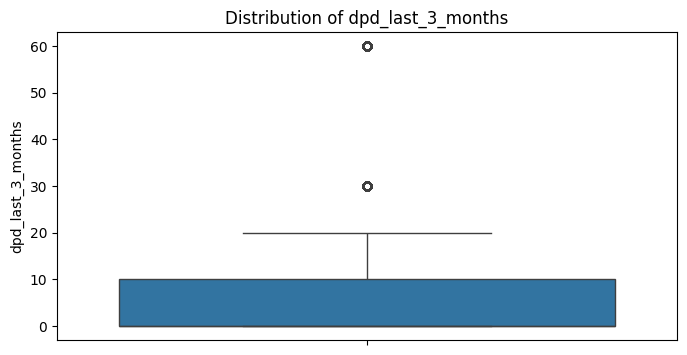

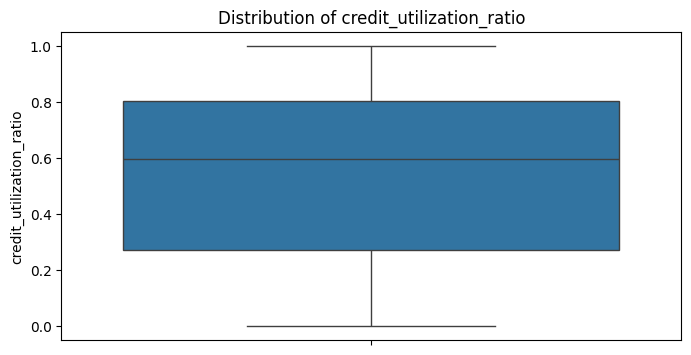

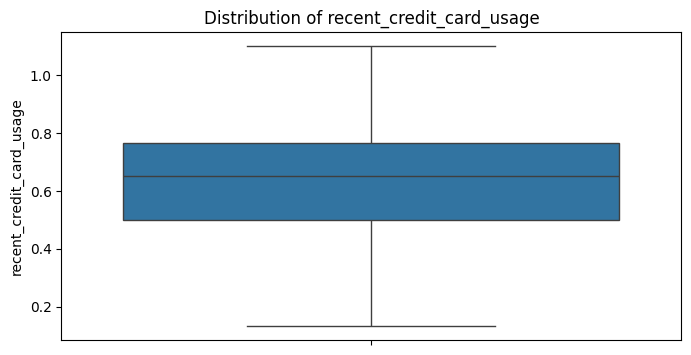

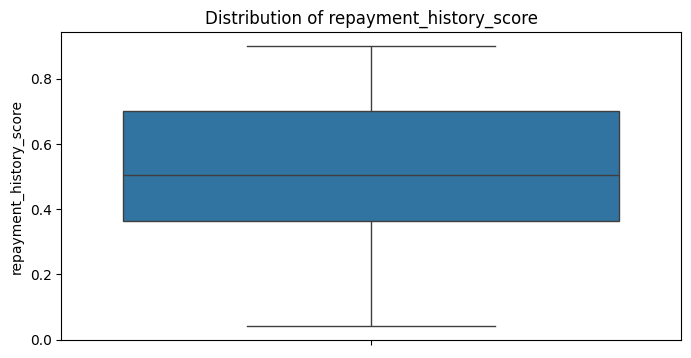

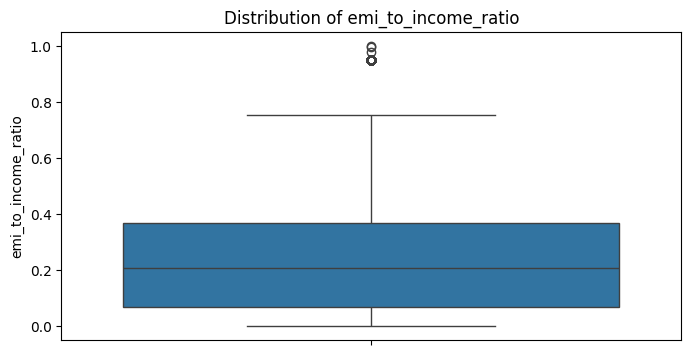

In [13]:

columns = ['num_open_loans', 'dpd_last_3_months', 'credit_utilization_ratio', 'recent_credit_card_usage', 'repayment_history_score', 'emi_to_income_ratio' ]
for col in columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(df[col])
    plt.title(f'Distribution of {col}')
    plt.show()

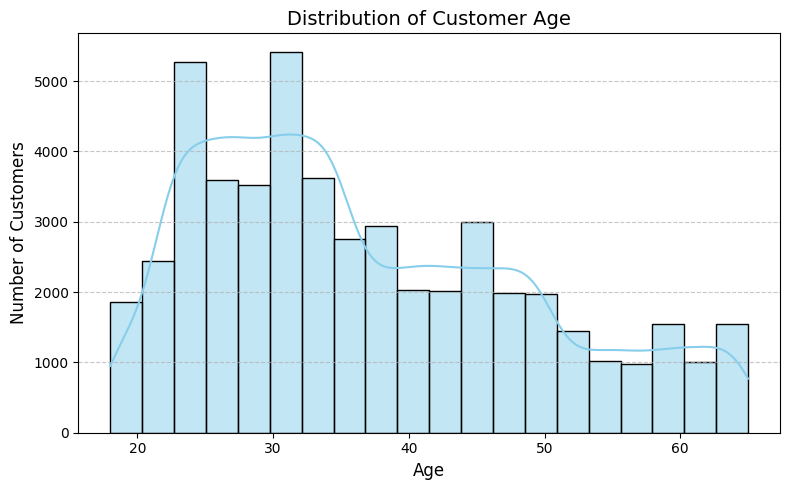

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.title('Distribution of Customer Age', fontsize=14)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


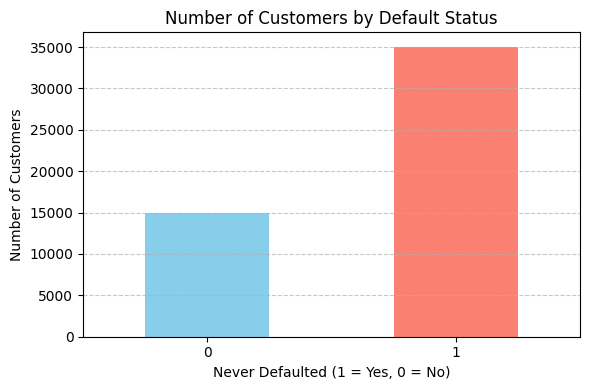

In [15]:
counts = df['never_defaulted'].value_counts().sort_index()

# Plotting the bar chart
plt.figure(figsize=(6,4))
counts.plot(kind='bar', color=['skyblue', 'salmon'])

plt.title('Number of Customers by Default Status')
plt.xlabel('Never Defaulted (1 = Yes, 0 = No)')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
df

,age,num_open_loans,dpd_last_3_months,num_hard_inquiries_last_6,credit_utilization_ratio,recent_credit_card_usage,repayment_history_score,target_credit_score_movement,never_defaulted,months_since_last_default_cleaned,emi_to_income_ratio,recent_loan_disbursed_amount_log,is_high_loan_outlier
0,34,1,1,1,0.914346,0.809645,0.360,2,1,48.0,0.161063,11.826312,0
1,29,2,0,0,0.683370,0.653300,0.350,2,0,3.0,0.164350,0.000000,0
2,42,5,20,4,0.443179,0.777369,0.378,2,1,48.0,0.189891,0.000000,0
3,28,1,0,0,0.899351,0.766941,0.700,2,1,48.0,0.093167,11.534237,0
4,29,2,0,2,0.465425,0.577841,0.729,2,1,48.0,0.222212,12.016980,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,52,2,0,0,0.659107,0.563643,0.490,2,1,48.0,0.441171,12.086247,0
49996,28,1,0,1,0.070653,0.426326,0.630,1,1,48.0,0.461730,0.000000,0
49997,49,2,10,2,0.631578,0.832205,0.353,2,1,48.0,0.490002,12.262202,0
49998,33,2,5,1,0.708261,0.731088,0.504,0,1,48.0,0.139673,11.760902,0


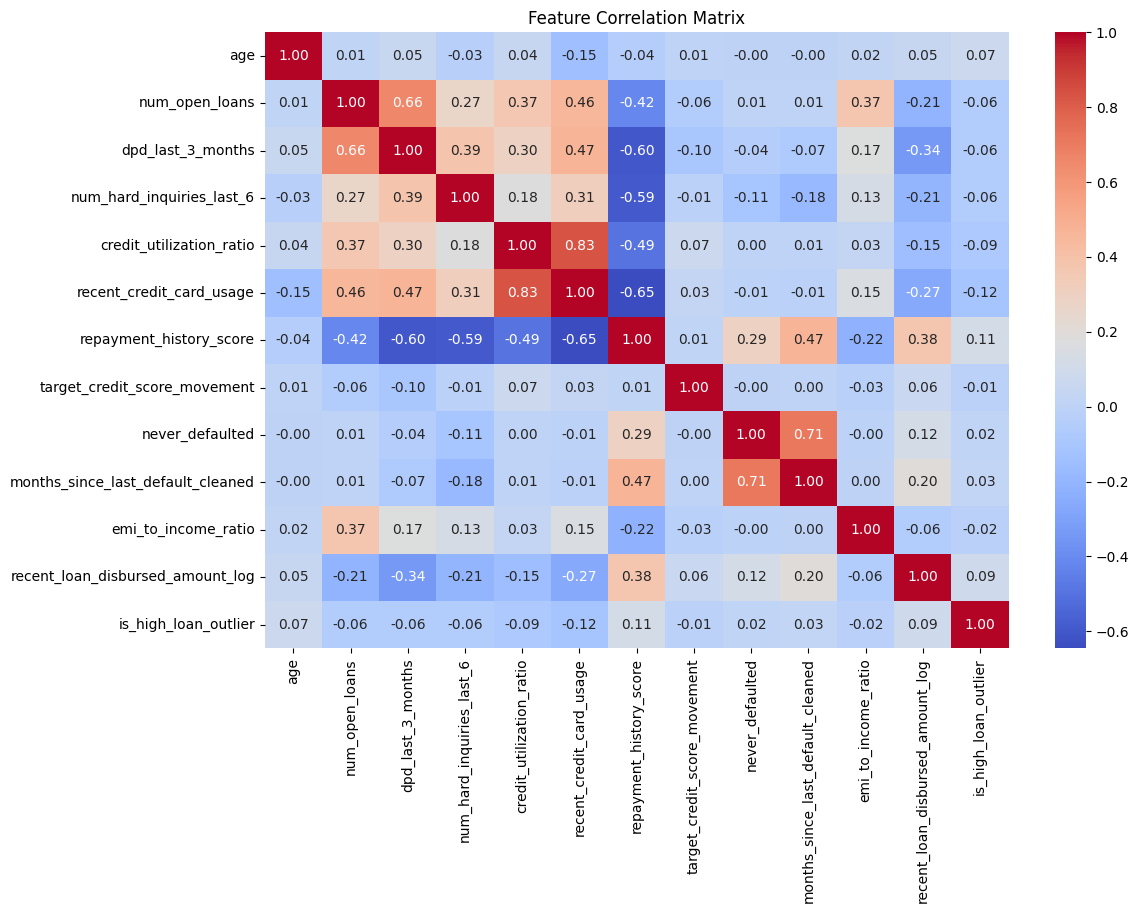

In [17]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [18]:
for i, label in enumerate(target_encoder.classes_):
    print(f"Label: '{label}' -> Encoded Value: {i}")

Label: 'Decrease' -> Encoded Value: 0
Label: 'Increase' -> Encoded Value: 1
Label: 'Stable' -> Encoded Value: 2


In [19]:
# Features (X) and Target (y)
X = df.drop(columns=['target_credit_score_movement'])  # Drop 'customer_id' and 'target'
y = df['target_credit_score_movement']


In [20]:
X.shape

(50000, 12)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, stratify=y, random_state=42
)

In [22]:
# from imblearn.over_sampling import BorderlineSMOTE

# bl_smote = BorderlineSMOTE(random_state=42)
# X_train_resampled, y_train_resampled = bl_smote.fit_resample(X_train, y_train)

KMeansSMOTE Gives the Best Result

In [23]:
from imblearn.over_sampling import KMeansSMOTE

kmeans_smote = KMeansSMOTE(random_state=42)
X_train_resampled, y_train_resampled = kmeans_smote.fit_resample(X_train, y_train)

In [24]:
# from imblearn.over_sampling import ADASYN
# smote = SMOTE(k_neighbors=2, random_state=42)
# # adasyn = ADASYN(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [25]:
y_train_resampled.value_counts()

target_credit_score_movement
1    15210
2    15207
0    15207
Name: count, dtype: int64

In [26]:
# Initialize the Random Forest classifier with 100 trees
# rf = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Train the model
rf.fit(X_train_resampled, y_train_resampled)

# Predict the target on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation metrics
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.65816
Confusion Matrix:
[[  676   160  2852]
 [  108  3151  2845]
 [  857  1724 12627]]
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.18      0.25      3688
           1       0.63      0.52      0.57      6104
           2       0.69      0.83      0.75     15208

    accuracy                           0.66     25000
   macro avg       0.58      0.51      0.52     25000
weighted avg       0.63      0.66      0.63     25000



This Cell Has the Best Score among all the tried approaches

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# Initialize model
rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                  
    scoring='f1_weighted',    
    n_jobs=-1,                 
    verbose=2
)

# Fit on the resampled data
grid_search.fit(X_train_resampled, y_train_resampled)

# Predict on test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

# Evaluate
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best CV Score: {grid_search.best_score_:.4f}")

print("\n Classification Report:")
print(classification_report(y_test, y_pred))
print("\n Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best CV Score: 0.7898

 Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.19      0.26      3688
           1       0.63      0.51      0.57      6104
           2       0.69      0.83      0.76     15208

    accuracy                           0.66     25000
   macro avg       0.58      0.51      0.53     25000
weighted avg       0.64      0.66      0.64     25000


 Confusion Matrix:
[[  690   151  2847]
 [  109  3136  2859]
 [  825  1697 12686]]

 Accuracy: 0.6605


In [28]:
from xgboost import XGBClassifier
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

sample_weights = compute_sample_weight(class_weight='balanced', y=y_train)

model = XGBClassifier(
    objective='multi:softprob',
    eval_metric='mlogloss',
    use_label_encoder=False,
    tree_method='hist',
    random_state=42
)

model.fit(X_train, y_train, sample_weight=sample_weights)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


c:\Users\Dhaval\miniconda3\envs\jupyter_intern\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:20:53] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy: 0.5827
Confusion Matrix:
[[ 562   35  878]
 [ 289 1281  872]
 [1527  572 3984]]
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.38      0.29      1475
           1       0.68      0.52      0.59      2442
           2       0.69      0.65      0.67      6083

    accuracy                           0.58     10000
   macro avg       0.54      0.52      0.52     10000
weighted avg       0.62      0.58      0.60     10000



In [29]:
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


# Base Classifiers
clf1 = LogisticRegression(max_iter=1000)
clf2 = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
clf3 = XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, use_label_encoder=False, eval_metric='mlogloss')

#  Voting Classifier (soft voting for multiclass probabilities)
voting_clf = VotingClassifier(
    estimators=[
        ('lr', clf1),
        ('rf', clf2),
        ('xgb', clf3)
    ],
    voting='soft'  # uses predicted probabilities
)

# Pipeline with Scaling (important for Logistic Regression)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('voting_clf', voting_clf)
])

#  Fit model
pipeline.fit(X_train_resampled, y_train_resampled)

#  Predict
y_pred = pipeline.predict(X_test)

#  Evaluation
print(" Accuracy:", accuracy_score(y_test, y_pred))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n Classification Report:\n", classification_report(y_test, y_pred, target_names=['Decrease', 'Increase', 'Stable']))


c:\Users\Dhaval\miniconda3\envs\jupyter_intern\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:21:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Accuracy: 0.5837

 Confusion Matrix:
 [[ 331  194  950]
 [ 115 1409  918]
 [ 624 1362 4097]]

 Classification Report:
               precision    recall  f1-score   support

    Decrease       0.31      0.22      0.26      1475
    Increase       0.48      0.58      0.52      2442
      Stable       0.69      0.67      0.68      6083

    accuracy                           0.58     10000
   macro avg       0.49      0.49      0.49     10000
weighted avg       0.58      0.58      0.58     10000



In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

# Define model + param grid combinations
models_and_params = [
    {
        "name": "Random Forest",
        "estimator": RandomForestClassifier(),
        "params": {
            "n_estimators": [100, 200],
            "max_depth": [5, 10],
        }
    },
    {
        "name": "XGBoost",
        "estimator": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss'),
        "params": {
            "n_estimators": [100],
            "max_depth": [3, 5],
            "learning_rate": [0.1, 0.3]
        }
    },
    {
        "name": "Logistic Regression",
        "estimator": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.1, 1, 10]
        }
    }
]

# Loop through each model and perform GridSearchCV
for model_dict in models_and_params:
    print(f" Tuning: {model_dict['name']}")
    
    grid = GridSearchCV(
        estimator=model_dict['estimator'],
        param_grid=model_dict['params'],
        cv=5,
        scoring='f1_macro',
        n_jobs=-1
    )
    
    grid.fit(X_train_resampled, y_train_resampled)
    print(f" Best Score for {model_dict['name']}: {grid.best_score_}")
    print(f" Best Params: {grid.best_params_}")
    print("="*60)


 Tuning: Random Forest
 Best Score for Random Forest: 0.7189353991705751
 Best Params: {'max_depth': 10, 'n_estimators': 100}
 Tuning: XGBoost


c:\Users\Dhaval\miniconda3\envs\jupyter_intern\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:21:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


 Best Score for XGBoost: 0.7605439389696695
 Best Params: {'learning_rate': 0.3, 'max_depth': 5, 'n_estimators': 100}
 Tuning: Logistic Regression
 Best Score for Logistic Regression: 0.6561533142885659
 Best Params: {'C': 0.1}


c:\Users\Dhaval\miniconda3\envs\jupyter_intern\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
from imblearn.pipeline import Pipeline
from sklearn.svm import SVC

pipeline = Pipeline(steps=[
    ('smote', KMeansSMOTE(random_state=42)),
    ('scaler', StandardScaler()),
    ('svm', SVC(kernel='rbf', C=1.0, gamma='scale'))
])

pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.09      0.15      1475
           1       0.48      0.53      0.50      2442
           2       0.67      0.79      0.73      6083

    accuracy                           0.62     10000
   macro avg       0.62      0.47      0.46     10000
weighted avg       0.63      0.62      0.59     10000

